In [41]:
library(CellChat)
#library(patchwork)
options(stringsAsFactors = FALSE)
#library(Seurat)
library(reticulate)
use_condaenv("semi")

### Real-profiled version

In [42]:
name = 'runexample'

dataname = 'moderate_real'

celltype_key = 'celltypes'

In [43]:
ad <- import("anndata", convert = FALSE)

fname = paste(name,'/',dataname,'.h5ad',sep='')
adata <- ad$read_h5ad(fname)

In [44]:
gtx = as.matrix(adata$X$todense()) # add todense if is sparse matrix

In [45]:
genes = reticulate::py_to_r(adata$var$index)
genes = c()
for (i in 1:length(adata$var$index)){
    gene = as.character(adata$var$index[i-1])
    genes = c(genes,gene)
}

In [46]:
colnames(gtx) = genes
totalcid = c()

for (i in 1:length(adata$obs$index)){
    cid = as.character(adata$obs$index[i-1])
    totalcid = c(totalcid,cid)
}
ctypes = c()
for (i in 1:length(adata$obs[celltype_key])){
    ctype = as.character(adata$obs[celltype_key][i-1])
    ctypes = c(ctypes,ctype)
}


In [47]:
row.names(gtx)=totalcid
gtmeta = data.frame(labels = ctypes, row.names = totalcid) 
cellchat <- createCellChat(object = t(gtx), meta = gtmeta, group.by = "labels")
CellChatDB <- CellChatDB.human
CellChatDB.use <- CellChatDB 
cellchat@DB <- CellChatDB.use
cellchat <- subsetData(cellchat) 

[1] "Create a CellChat object from a data matrix"
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B_cell CD14 CD16 CD4 CD8 DCs gdT HSC Lymph_prolif MAIT Mono_prolif NK_16hi NK_56hi pDC Plasmablast Platelets RBC Treg 


In [48]:
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)

In [49]:
trim = 0.1
cellchat <- computeCommunProb(cellchat, type = "truncatedMean", trim = trim)
cellchat <- computeCommunProbPathway(cellchat)
cellchat <- aggregateNet(cellchat)
cellchat <- netAnalysis_computeCentrality(cellchat)


truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2023-12-11 18:34:55.236592]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2023-12-11 18:35:36.502491]"


Do heatmap based on a single object 




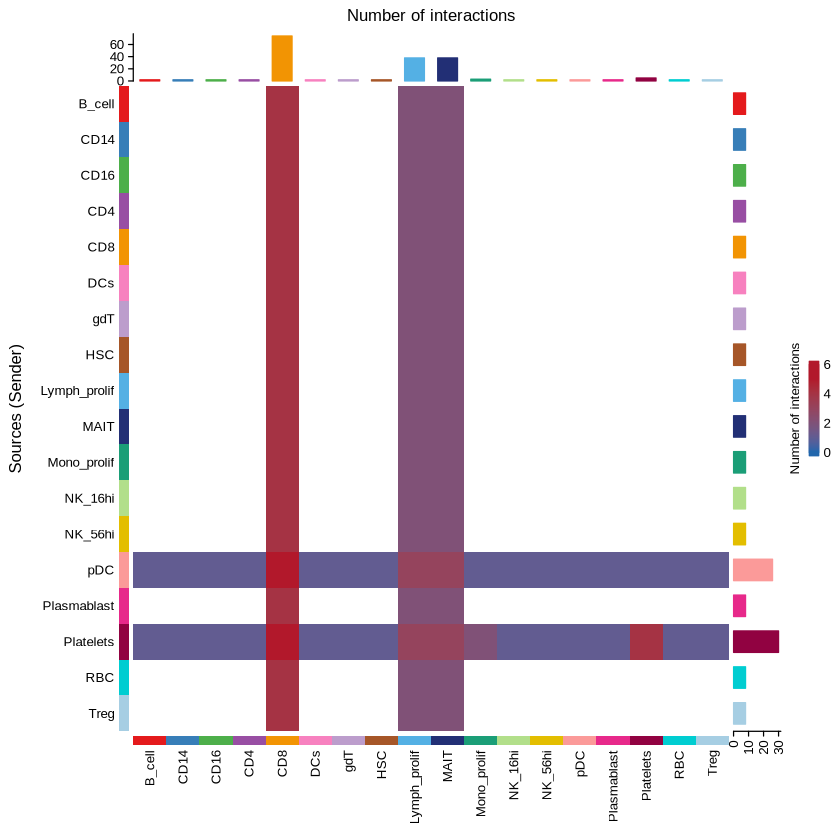

In [50]:
netVisual_heatmap(cellchat)

### Semi-profiled version

In [51]:
name = 'runexample'
dataname = 'moderate_semi'

celltype_key = 'celltypes'

ad <- import("anndata", convert = FALSE)

fname = paste(name,'/',dataname,'.h5ad',sep='')
adata <- ad$read_h5ad(fname)

gtx = as.matrix(adata$X)


In [52]:
genes = reticulate::py_to_r(adata$var$index)
genes = c()
for (i in 1:length(adata$var$index)){
    gene = as.character(adata$var$index[i-1])
    genes = c(genes,gene)
}

In [53]:
colnames(gtx) = genes
totalcid = c()

for (i in 1:length(adata$obs$index)){
    cid = as.character(adata$obs$index[i-1])
    totalcid = c(totalcid,cid)
}
ctypes = c()
for (i in 1:length(adata$obs[celltype_key])){
    ctype = as.character(adata$obs[celltype_key][i-1])
    ctypes = c(ctypes,ctype)
}


In [54]:
row.names(gtx)=totalcid
gtmeta = data.frame(labels = ctypes, row.names = totalcid) 
cellchat <- createCellChat(object = t(gtx), meta = gtmeta, group.by = "labels")
CellChatDB <- CellChatDB.human
CellChatDB.use <- CellChatDB 
cellchat@DB <- CellChatDB.use
cellchat <- subsetData(cellchat) 

[1] "Create a CellChat object from a data matrix"
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B_cell CD14 CD16 CD4 CD8 DCs gdT HSC Lymph_prolif MAIT Mono_prolif NK_16hi NK_56hi pDC Plasmablast Platelets RBC Treg 


In [55]:
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)

In [56]:
trim = 0.1
cellchat <- computeCommunProb(cellchat, type = "truncatedMean", trim = trim)
cellchat <- computeCommunProbPathway(cellchat)
cellchat <- aggregateNet(cellchat)
cellchat <- netAnalysis_computeCentrality(cellchat)


truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2023-12-11 18:36:01.053584]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2023-12-11 18:36:46.818817]"


Do heatmap based on a single object 




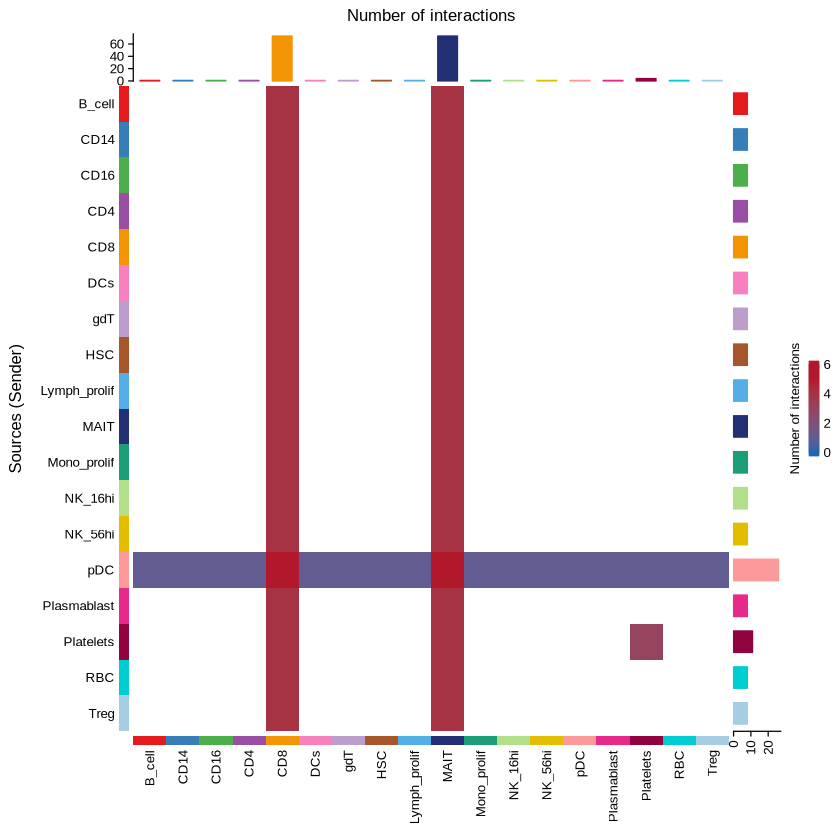

In [57]:
netVisual_heatmap(cellchat)